# Análisis de Privacidad de Usuario: ¿Cambio natural de paradigma o agenda forzada?
## Trabajo Integrador Individual
## "De Texto Crudo a Insights: Pipeline Completo de Análisis de NLP"

**Fecha de entrega**: Jueves 25 de septiembre  

---

## 1.0 Selección de ideas anteriores

### Intento de Corpus literario

Se han revisado varias fuentes posibles de información para cuentos contemporáneos o de autores latinoamericanos pero encontré varios problemas a la hora de seleccionar el corpus de este formato que cumpla con el criterio minimo de volumen para procesarlo...

#### Project Gutenberg
Usando https://www.gutenberg.org/browse/languages/es

Autor elegido: Blasco Ibáñez, Vicente, 1867-1928

No tenia suficiente volumen digerible para cuentos y las obras parecían dispersas y repetidas

No tuve forma de encontrar en una forma concisa autores argentinos o latinoamericanos que estén en Gutenberg y que dispongan de mucho material usable para el proyecto... Podria buscar a mano pero tardaria mucho

Se intentó recolectar datos con
* Cuentos valencianos
https://www.gutenberg.org/ebooks/66514

* La condenada (cuentos)
https://www.gutenberg.org/ebooks/27736

* La Catedral

Entre otros...

#### Biblioteca Digital Argentina
La página no se encuentra disponible, y las alternativas no son lo suficientemente voluminosas o contemporaneas para el target que se busca

#### Cervantes Virtual
Mayoritariamente autores españoles, se buscaban autores latinoamericanos

#### Ciudad Seva
De algun modo no me convenció del todo, y preferí buscar otro tipo de corpus para entonces

## 1.1 Descripción del corpus elegido
Se decide entonces recolectar información relacionada al tema *tecnología*, con énfasis en el asunto de **privacidad**.

### Fuentes seleccionadas

Fuentes elegidas
- https://derechodelared.com/
- https://www.anred.org/
- https://www.pagina12.com.ar/

Se omiten otros sitios periodisticos como Clarin, La Nación e Infobae ya que no proporcionaban suficiente información relevante al filtro que queremos aplicar

---

Yapa - No usables pero interesantes para tener en RSS posiblemente?
- https://www.elladodelmal.com/
- (Listado con más blogs y sitios periodisticos) https://www.genbeta.com/seguridad/17-expertos-blogs-y-newsletter-a-seguir-si-de-verdad-te-interesan-seguridad-y-privacidad


## 1.2 Justificación de elección

### ¿Por qué este corpus?

La razón principal ocurre por dos factores:
- A nivel temático, es un asunto contemporáneo que, como otros rubros de la ciencia, está constantemente en transformación y más considerando las tendencias de desarrollos de tecnologías automatizadas que se profundizaron en la última década.
- Al ser un asunto popular, aporta un buen volumen con suficiente variabilidad para elegir algún tema específico sin que falten recursos para hacer una retrospectiva
- Si bien fue un tema de debate durante el 2015 al 2020, el asunto de privacidad e integridad de datos de usuario es un tema que sigue siendo relevante y que no habria que perder de vista, más considerando el factor de recolección de datos usados para modelos de IA

### ¿Qué buscamos descubrir?

El enfoque de este corpus a analizar es el poder encontrar más contexto sobre los actores en juego a la hora de avanzar con ciertos cambios en la cotidianeidad del uso de nuestros datos personales

### Hipotesis: "¿De verdad es necesario todo esto?"
¿Son realmente necesarias las nuevas exigencias en los términos y condiciones modificados?

¿Por qué se necesitan nuevas regulaciones año tras año de parte de protección de datos?

¿El factor económico de redistribución de datos personales sigue siendo tan presente como hace 5 años?

La hipótesis que planteo es que si bien se vió enlentecido el proceso de nuevos requerimientos que involucren vender nuestra privacidad de datos personales, sigue siendo igual de relevante que durante la década pasada.


## 1.3 Proceso de recolección

Los textos fueron obtenidos a mano a través de las fuentes mencionadas en 1.1, utilizando las palabras "privacidad" y "datos personales" en los buscadores integrados de dichas páginas. Se ha incluido una fuente adicional usando un buscador como DuckDuckGo.

### Criterios de inclusión/exclusión

Se determina la exclusión de artículos que contengan:
- Alto contenido en imágenes en formato de infografías
- Contenido relacionado a la privacidad de una persona en particular (política/celebridad o no), a menos que se mencione información que aporte al contexto general del corpus
- Anuncios de aplicaciones nuevas que puedan proporcionar alternativas a las comunes (usualmente están orientadas a cubrir las características del programa en vez de informar en general)

### Dificultades y obstáculos

En la obtención de recursos he encontrado los siguientes obstáculos:

- Calidad de artículos gratuitos. Se encontraron los suficientes para cubrir casos recientes, pero muchos artículos se encuentran restringidos para usuarios registrados a newsletters.
- Web scraping - La estructura de metadatos HTML varía mucho entre distintas fuentes. Un ejemplo de esto es al buscar el título de los artículos de www.derechodelared.com, la falta de dato de autor en los de www.anred.org, o los formatos variantes en fechas, etc.
- Falta de tiempo para organizarme mejor. Muchas tareas en paralelo impidieron una mejor calidad de recolección.


## 1.4 Estadísticas básicas

### Código inicial

#### Import de librerias

In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import os
import re
import shutil
from google.colab import files
from urllib.parse import urlparse

# Manejo de errores
import traceback


#### Obtención de listado de URLs
Las urls a probar de mi corpus están guardadas en un .txt dentro del repositorio

In [20]:
# 003_barthou-gonzalo-nlp-integrador/corpus/corpusList.txt

# URL cruda del archivo en GitHub
github_txt_url = "https://raw.githubusercontent.com/gimb99/PDH_BARTHOU_GONZALO/refs/heads/main/003_barthou-gonzalo-nlp-integrador/corpus/corpusList.txt"

# Descargar y procesar las líneas
response = requests.get(github_txt_url)
lines = response.text.splitlines()
urls = [line.strip() for line in lines if line.strip()]


#### Guardado de .txt como archivos raw

In [63]:
# Crear carpeta para guardar los archivos
folder = "raw_texts"
os.makedirs(folder, exist_ok=True)

# Función para limpiar el nombre del archivo
def clean_filename(title, index):
    title = re.sub(r'[^\w\s-]', '', title).strip().replace(' ', '_')
    return f"{index:03d}_{title[:50]}.txt"  # Limita el nombre a 50 caracteres

default_no_disponible = "No disponible"

# Recorrer las URLs
for i, url in enumerate(urls, start=1):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")

        # Extraer título y texto (ajustar según el sitio)
        domain = urlparse(url).netloc
        try:
          if "derechodelared.com" in domain:
            title = soup.find("meta", property="og:title")["content"]
            autor_crudo = soup.find("a", attrs={"rel": "author"})
            autor_tag = default_no_disponible
            if autor_crudo:
              autor_tag = autor_crudo.get_text(strip=True)

            fecha_tag = soup.find("meta", property="article:published_time")["content"]
            categoria_tag = soup.find("a", rel="category tag").get_text(strip=True)
          elif "www.pagina12.com" in domain:
            title = soup.find("meta", property="og:title")["content"]
            autor_tag = soup.find("meta", property="article:author")["content"]
            fecha_tag = soup.find("meta", property="article:published_time")["content"]
            categoria_tag = soup.find("meta", property="article:section")["content"]
          elif "anred" in domain:
            title = soup.find("meta", property="og:title")["content"]
            # No se encuentran autores en muchos articulos, se procede a dejar en default
            # autor_tag = soup.find("meta", property="article:author")["content"]
            autor_tag = default_no_disponible
            #fecha_tag = soup.find("div", class_="date text-muted")
            # 1. Localizar el div
            fecha_crudo = soup.find("div", class_="date text-muted")
            # 2. Extraer solo el texto y limpiarlo
            fecha_texto = fecha_crudo.get_text(strip=True)  # -> "14/03/2023"
            # 3. Parsear a objeto fecha de Python
            from datetime import datetime
            fecha_tag = datetime.strptime(fecha_texto, "%d/%m/%Y")

            categoria_tag = soup.find("meta", property="article:section")["content"]
          else:
            title = soup.find("h1").get_text(strip=True)
        except Exception as e:
          print(f"❌ Error con datos de {url}: {e}")
          traceback.print_exc()
          title = f"articulo_{i}"

        paragraphs = soup.find_all("p")

        # Guardado datos en variables
        text = "\n".join([p.get_text(strip=True) for p in paragraphs])
        #autor_fuente = autor_tag.get_text(strip=True) if autor_tag else default_no_disponible
        autor_fuente = autor_tag if autor_tag else default_no_disponible
        #fecha = fecha_tag.get_text(strip=True) if fecha_tag else ""
        fecha = fecha_tag if fecha_tag else default_no_disponible
        #categoria = categoria_tag.get_text(strip=True) if categoria_tag else default_no_disponible
        categoria = categoria_tag if categoria_tag else default_no_disponible

        # Guardar como archivo .txt
        filename = clean_filename(title, i)
        filepath = os.path.join(folder, filename)

        with open(filepath, "w", encoding="utf-8") as f:
            f.write(f"URL: {url}\n")
            f.write(f"Título: {title}\n")
            f.write(f"Autor: {autor_fuente}\n")
            f.write(f"Fecha: {fecha}\n")
            f.write(f"Categoría: {categoria}\n\n")
            f.write(text)

        print(f"✅ Guardado: {filename}")

    except Exception as e:
        print(f"❌ Error con {url}: {e}")

✅ Guardado: 001_Tiktok_se_enfrenta_a_una_posible_multa_de_27_millo.txt
✅ Guardado: 002_Manzana_podrida_decenas_de_exespías_israelíes_fuer.txt
✅ Guardado: 003_El_auge_del_tecnofeudalismo__ANRed.txt
✅ Guardado: 004_Qué_hay_detrás_de_las_colas_para_la_venta_de_iris_.txt
✅ Guardado: 005_Sam_Altman_creador_de_ChatGPT_y_GPT-4_mi_peor_temo.txt
✅ Guardado: 006_Natalia_Zuazo_el_problema_es_cuando_el_avance_de_l.txt
✅ Guardado: 007_Espionaje_ilegal_del_Ministerio_de_Seguridad_porte.txt
✅ Guardado: 008_Pensamiento_crítico_De_verdad_sabemos_qué_hacemos_.txt
✅ Guardado: 009_CABA_la_Legislatura_porteña_debate_un_polémico_pro.txt
✅ Guardado: 010_WhatsApp_no_cerrará_cuentas_pero_limitará_funcione.txt
✅ Guardado: 011_Polisis_una_IA_que_se_lee_las_políticas_de_privaci.txt
✅ Guardado: 012_La_AEPD_presenta_nuevos_recursos_para_fomentar_la_.txt
✅ Guardado: 013_Chat_Control_el_plan_europeo_para_escanear_tus_men.txt
✅ Guardado: 014_La_NSA_compra_datos_de_navegación_de_los_usuarios_.txt
✅ Guardado: 015_Micros

##### Textos debug / desarrollo - Ignorar

Elminar carpeta para reintentar

In [62]:
# Eliminar carpeta

# folder = "raw_texts"
# for filename in os.listdir(folder):
#     file_path = os.path.join(folder, filename)
#     try:
#         if os.path.isfile(file_path):
#             os.remove(file_path)
#             print(f"🗑️ Borrado: {filename}")
#     except Exception as e:
#         print(f"❌ Error con {filename}: {e}")

🗑️ Borrado: 003_El_auge_del_tecnofeudalismo__ANRed.txt
🗑️ Borrado: 011_Polisis_una_IA_que_se_lee_las_políticas_de_privaci.txt
🗑️ Borrado: 007_Espionaje_ilegal_del_Ministerio_de_Seguridad_porte.txt
🗑️ Borrado: 023_Apple_multada_Francia_sanciona_con_162_millones_po.txt
🗑️ Borrado: 004_Qué_hay_detrás_de_las_colas_para_la_venta_de_iris_.txt
🗑️ Borrado: 026_La_era_del_capitalismo_digital_magnates_tecnológic.txt
🗑️ Borrado: 013_Chat_Control_el_plan_europeo_para_escanear_tus_men.txt
🗑️ Borrado: 024_Cómo_las_grandes_empresas_tech_lograron_meterse_en.txt
🗑️ Borrado: 015_Microsoft_mantendrá_en_la_UE_los_datos_personales_.txt
🗑️ Borrado: 005_Sam_Altman_creador_de_ChatGPT_y_GPT-4_mi_peor_temo.txt
🗑️ Borrado: 022_Catamarca_y_Telecentro_firman_un_acuerdo_histórico.txt
🗑️ Borrado: 008_Pensamiento_crítico_De_verdad_sabemos_qué_hacemos_.txt
🗑️ Borrado: 002_Manzana_podrida_decenas_de_exespías_israelíes_fuer.txt
🗑️ Borrado: 021_Meta_enfrenta_sanciones_millonarias_en_Nigeria_por.txt
🗑️ Borrado: 020_Bullri

Guardado de zip

In [64]:
# Guardado de .zip para luego extraerlo y subirlo a github
# shutil.make_archive("raw_texts", "zip", "raw_texts")
# files.download("raw_texts.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Guardado de metadata.csv v2

In [65]:
folder = "raw_texts"
metadata = []

for filename in os.listdir(folder):
    filepath = os.path.join(folder, filename)

    if os.path.isfile(filepath) and filename.endswith(".txt"):
        with open(filepath, "r", encoding="utf-8") as f:
            content = f.read()

        # Separar líneas para buscar metadatos
        lines = content.splitlines()

        # Extraer título, autor, fecha, categoría (si están presentes)
        titulo = ""
        autor_fuente = ""
        fecha = ""
        categoria = ""

        for line in lines[:10]:  # Buscar en las primeras líneas
            if line.lower().startswith("título:"):
                titulo = line.split(":", 1)[1].strip()
            elif line.lower().startswith("autor:") or line.lower().startswith("fuente:"):
                autor_fuente = line.split(":", 1)[1].strip()
            elif line.lower().startswith("fecha:"):
                fecha = line.split(":", 1)[1].strip()
            elif line.lower().startswith("categoría:"):
                categoria = line.split(":", 1)[1].strip()

        # Calcular número aproximado de palabras
        cuerpo = "\n".join(lines[10:])  # Suponiendo que el cuerpo empieza después de los metadatos
        palabras_aprox = len(cuerpo.split())

        metadata.append({
            "archivo": filename,
            "titulo": titulo,
            "autor_fuente": autor_fuente,
            "fecha": fecha,
            "categoria": categoria,
            "palabras_aprox": palabras_aprox
        })

# Guardar como CSV
df = pd.DataFrame(metadata)
df.to_csv("metadata.csv", index=False)


### Número total de textos


#### Paso 0 - Get de metadata.csv desde GitHub

In [67]:
# Opción A: si subiste metadata.csv directamente al espacio de Colab
# df = pd.read_csv("metadata.csv")

# Opcion B / Obtener de github
# URL cruda del archivo en GitHub
github_metadata_url = "https://raw.githubusercontent.com/gimb99/PDH_BARTHOU_GONZALO/refs/heads/main/003_barthou-gonzalo-nlp-integrador/corpus/metadata.csv"

# Descargar y procesar las líneas
# response = requests.get(github_txt_url)
df = pd.read_csv(github_metadata_url)

#### Paso Real

In [69]:
# 2.1 Número total de textos
total_textos = len(df)
print("Total de textos:", total_textos)

Total de textos: 26


### Número total de palabras

In [70]:
total_palabras = df["palabras_aprox"].sum()
print("Total aproximado de palabras:", total_palabras)

Total aproximado de palabras: 25695


### Distribución de tamaños de documentos

count      26.000000
mean      988.269231
std       841.510526
min        61.000000
25%       283.000000
50%       706.000000
75%      1776.250000
max      2585.000000
Name: palabras_aprox, dtype: float64


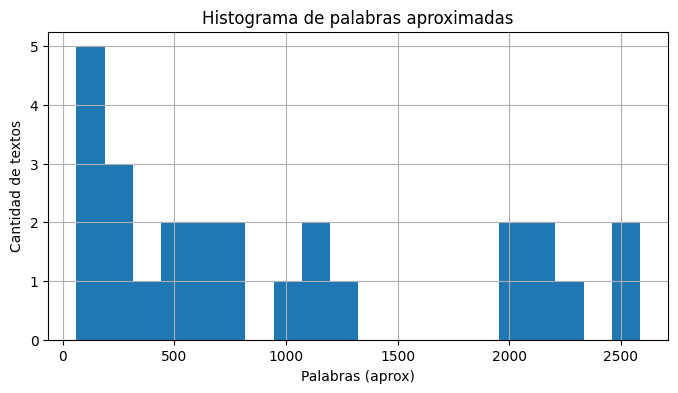

In [71]:
# Estadísticos básicos
print(df["palabras_aprox"].describe())

# Histograma con pandas/matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df["palabras_aprox"].hist(bins=20)
plt.title("Histograma de palabras aproximadas")
plt.xlabel("Palabras (aprox)")
plt.ylabel("Cantidad de textos")
plt.show()


### Gráfico de distribución temporal

/tmp/ipython-input-4053633844.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["fecha"] = pd.to_datetime(df["fecha"], dayfirst=True, errors="coerce")


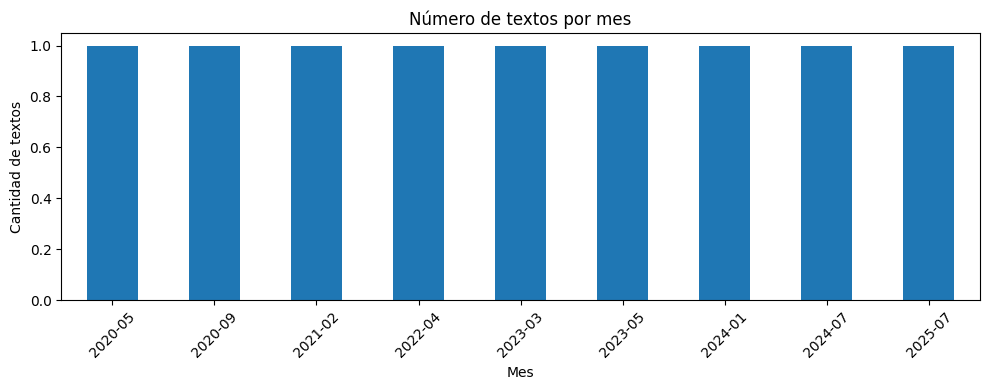

In [72]:
# Convertir 'fecha' a datetime (ajusta el formato si es necesario)
df["fecha"] = pd.to_datetime(df["fecha"], dayfirst=True, errors="coerce")

# Agrupar por mes
df_mes = df.groupby(df["fecha"].dt.to_period("M")).size()

# Dibujar
df_mes.plot(kind="bar", figsize=(10,4))
plt.title("Número de textos por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de textos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La distribución no da resultados eficientes dado que no se obtuvo una fecha con el mismo formato para todos los artículos. Por tanto, no es posible aplicar una distribución temporal a menos que se fixee el formato final en metadata.csv

## 1.5 Exploración inicial

---

## Parte 2: Análisis Técnico - Estructura del Notebook


## Datos de commiteo - Ignorar

In [ ]:
## Para commits, guardar ruta como
## 003_barthou-gonzalo-nlp-integrador/notebook/analisis_integrador.ipynb